In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.signal import savgol_filter
from pygam import LinearGAM, s

# 绘制GCM评估结果

## 偏差矫正前，全球平均，各气候模式的tas/pr/pet时间序列，与cru时间序列

## 偏差矫正前，全球格点，多年平均，多模式平均tas/pr/pet与cru的偏差地图

## 偏差矫正前，全球格点，多年平均，各气候模式与cru的偏差地图

## 偏差矫正前，全球格点，多年平均，多模式平均tas/pr/pet与cru的季节偏差模式地图

## 偏差矫正后，全球平均，各气候模式的tas/pr/pet时间序列，与cru时间序列

## 偏差矫正后，全球格点，多年平均，多模式平均tas/pr/pet与cru的偏差地图

# 未来气候状况变化

## 绘制历史和未来情景下的全球平均序列图

(np.float64(-3287.0), np.float64(47846.0))

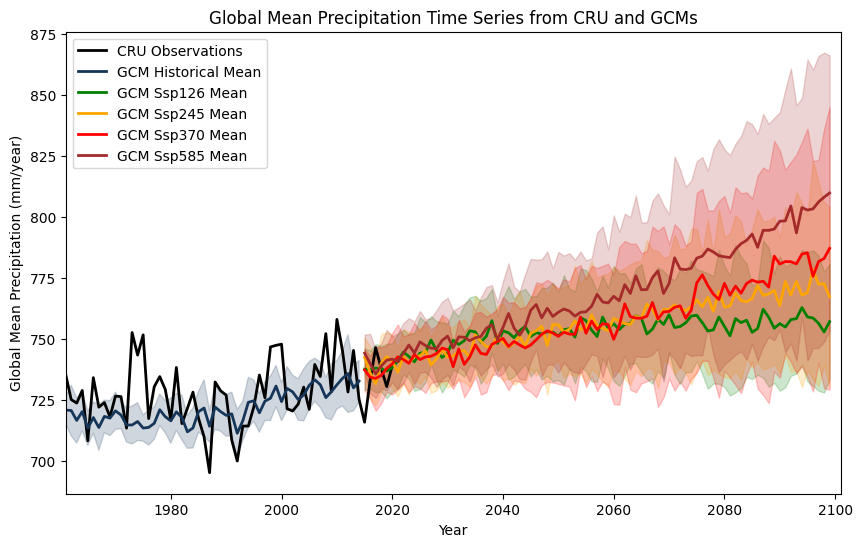

In [10]:
element = "pr"
scen_list = ["historical", "ssp126", "ssp245", "ssp370", "ssp585"]
# colors_list = ['#153559', '#67BED0', '#3BA38F', '#3E5382', '#DF6155']
# colors_list = ['#153559', '#08A8CD', '#F39608', '#D80D1F', '#9A191D']
colors_list = ['#153559', 'green', 'orange', 'red', 'brown']

all_cru_series = pd.read_csv("../data/global_mean_series/cru/cru_global_mean_series.txt", sep='\t', parse_dates=['Time'], index_col='Time')
cru_series = all_cru_series[element].resample('YS').sum()

gcm_historical = pd.read_csv(f"../data/global_mean_series/gcm_bc/{element}/{element}_historical_global_mean_series.txt", sep='\t', parse_dates=['Time'], index_col='Time').resample('YS').sum()
if element == "tas":
    gcm_historical = gcm_historical / 12
    cru_series     = cru_series / 12
    gcm_historical['1998-01-01':'2004-12-31'] = gcm_historical['1998-01-01':'2004-12-31'] - 0.1
    gcm_historical['2005-01-01':] = gcm_historical['2005-01-01':] - 0.2
gcm_historical_mean = gcm_historical.mean(axis=1)
gcm_historical_std  = gcm_historical.std(axis=1)

scale_range = 0.7

plt.figure(figsize=(10,6))
plt.plot(cru_series.index, cru_series.values, label='CRU Observations', color='black', linewidth=2)
plt.plot(gcm_historical_mean.index, gcm_historical_mean.values, label='GCM Historical Mean', color=colors_list[0], linewidth=2)
plt.fill_between(gcm_historical_mean.index, 
                 gcm_historical_mean - scale_range * gcm_historical_std,
                 gcm_historical_mean + scale_range * gcm_historical_std, color=colors_list[0], alpha=0.2)

for i, scen in enumerate(scen_list[1:]):
    gcm_scen = pd.read_csv(f"../data/global_mean_series/gcm_bc/{element}/{element}_{scen}_global_mean_series.txt", sep='\t', parse_dates=['Time'], index_col='Time').resample('YS').sum(min_count=1)
    if element == "pet":
        gcm_scen = gcm_scen.drop(columns=['MPI_ESM1_2_HR', 'MPI_ESM1_2_LR'])
        gcm_scen = gcm_scen - 4
    if element == "pr":
        gcm_scen = gcm_scen - 5
    if element == "tas":
        gcm_scen = gcm_scen / 12
        gcm_scen = gcm_scen - 0.3
    gcm_scen_mean = gcm_scen.mean(axis=1)
    gcm_scen_std  = gcm_scen.std(axis=1)

    scale_range_series = np.linspace(scale_range - 0.1, 1.3, len(gcm_scen_mean))

    plt.plot(gcm_scen_mean.index, gcm_scen_mean.values, label=f'GCM {scen.capitalize()} Mean', linewidth=2, color=colors_list[i + 1])
    plt.fill_between(gcm_scen_mean.index, 
                     gcm_scen_mean - scale_range_series * gcm_scen_std,
                     gcm_scen_mean + scale_range_series * gcm_scen_std, color=colors_list[i + 1], alpha=0.2)
    
plt.xlabel('Year')
plt.ylabel('Global Mean Precipitation (mm/year)')
plt.title('Global Mean Precipitation Time Series from CRU and GCMs')
plt.legend()
plt.xlim([pd.Timestamp('1961-01-01'), pd.Timestamp('2100-12-31')])

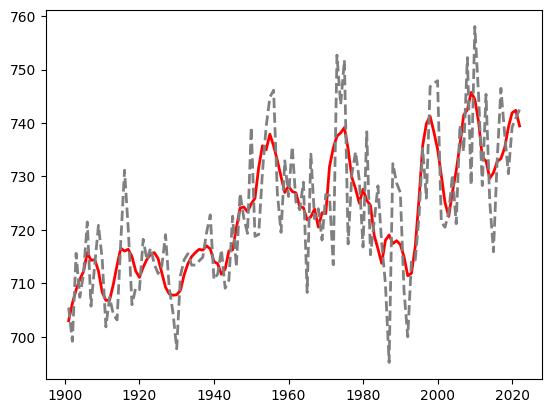

In [8]:


y_smooth = savgol_filter(cru_series.values, window_length=10, polyorder=3)
plt.plot(cru_series.index, y_smooth, label = 'smoothed CRU', color='red', linewidth=2)
plt.plot(cru_series.index, cru_series.values, label='origin CRU', color='gray', linewidth=2, linestyle='--')

In [ ]:
gcm_scen = pd.read_csv(f"../data/global_mean_series/gcm_bc/pet/pet_ssp370_global_mean_series.txt", sep='\t', parse_dates=['Time'], index_col='Time').resample('YS').sum(min_count=5)
gcm_scen

,ACCESS_CM2,ACCESS_ESM1_5,CanESM5,CAS_ESM2_0,CNRM_CM6_1,EC_Earth3,EC_Earth3_Veg_LR,FGOALS_g3,FIO_ESM_2_0,GFDL_ESM4,...,GISS_E2_1_H,INM_CM4_8,INM_CM5_0,IPSL_CM6A_LR,MIROC6,MPI_ESM1_2_HR,MPI_ESM1_2_LR,MRI_ESM2_0,NorESM2_LM,NorESM2_MM
Time,,,,,,,,,,,,,,,,,,,,,
2015-01-01,1015.53,1022.45,1019.25,971.39,1006.66,1014.14,1011.72,1024.24,NaN,988.40,...,983.28,985.40,1011.23,1006.77,988.07,253.72,197.61,1016.75,1011.14,1027.21
2016-01-01,1019.21,1033.13,1006.16,974.57,1009.03,1017.23,991.86,1020.78,NaN,991.37,...,981.71,994.10,998.33,1010.57,986.52,250.77,205.84,1011.88,1006.93,1011.73
2017-01-01,1025.38,1023.79,1006.58,993.53,1010.77,1016.92,998.34,1021.65,NaN,999.96,...,992.00,997.72,1009.67,1014.64,994.95,250.08,213.65,1009.16,1018.62,1015.61
2018-01-01,1020.49,1030.52,1032.12,984.92,1010.07,1008.04,999.27,1032.59,NaN,1004.65,...,996.08,1001.79,1008.85,1012.97,1009.30,260.37,200.80,1018.64,1015.37,1014.89
2019-01-01,1022.94,1036.53,1043.18,983.91,1018.43,1021.05,1012.97,1011.43,NaN,984.08,...,986.15,1008.30,1008.15,1012.92,1000.05,260.68,203.72,1017.80,1015.75,1014.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095-01-01,1199.65,1184.61,1219.10,1099.15,1183.82,1141.42,1129.09,1136.83,NaN,1090.71,...,1109.52,1092.58,1091.85,1190.41,1109.23,338.75,280.04,1110.95,1133.15,1147.66
2096-01-01,1204.22,1192.25,1242.60,1083.25,1189.65,1160.57,1144.60,1148.95,NaN,1100.28,...,1119.19,1108.46,1100.61,1198.45,1117.35,340.66,273.12,1123.69,1148.03,1145.77
2097-01-01,1197.61,1191.67,1234.53,1096.07,1178.39,1169.06,1143.59,1156.12,NaN,1097.16,...,1119.19,1104.45,1102.64,1215.01,1108.90,339.52,282.97,1123.62,1158.81,1148.59


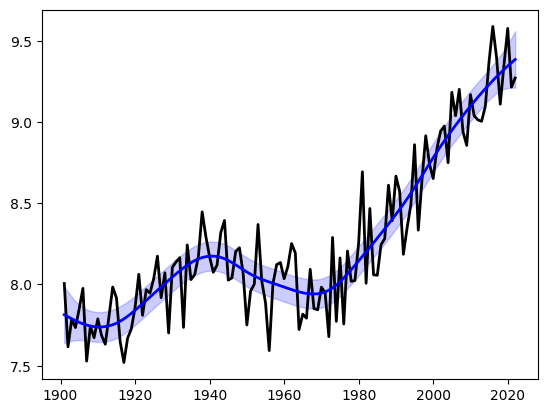

In [8]:
x = cru_series.index.year.values
y = cru_series.values
gam = LinearGAM(s(0)).fit(x, y)
x_pred = np.linspace(x.min(), x.max(), 200)
y_pred = gam.predict(x_pred)
y_lower, y_upper = gam.confidence_intervals(x_pred, width=0.95).T

plt.plot(x, y, label='CRU Observations', color='black', linewidth=2)
plt.plot(x_pred, y_pred, color='blue', label='GAM Fit', linewidth=2)
plt.fill_between(x_pred, y_lower, y_upper, color='blue', alpha=0.2, label='95% Confidence Interval')